# Collaberative Filtering

In [1]:
from fastai import *
from fastai.collab import *
from fastai.tabular import *

In [2]:
user, item, title = 'userId', 'movieId', 'title'

In [4]:
path = untar_data(URLs.ML_SAMPLE) # Movie Lens dataset sample
path

PosixPath('/home/jupyter/.fastai/data/movie_lens_sample')

In [5]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/movie_lens_sample/ratings.csv')]

In [6]:
ratings = pd.read_csv(path/'ratings.csv')

In [8]:
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


In [9]:
data = CollabDataBunch.from_df(ratings, seed = 42)

In [10]:
y_range = [0, 5.5]

In [11]:
learn = collab_learner(data, n_factors = 50, y_range = y_range)

In [12]:
learn.fit_one_cycle(4, 5e-3)

epoch,train_loss,valid_loss
1,1.752976,1.231809
2,0.897491,0.689552
3,0.673458,0.661860
4,0.595642,0.656554


## Now covering the whole dataset of MovieLens

Which consists of 100k data items available from http://files.grouplens.org/datasets/movielens/ml-100k.zip

In [3]:
path = Path('data/movielens')

In [4]:
path.mkdir(parents=True, exist_ok=True)

In [6]:
!wget http://files.grouplens.org/datasets/movielens/ml-100k.zip -P {path}

--2018-12-03 12:17:24--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.34.235
Connecting to files.grouplens.org (files.grouplens.org)|128.101.34.235|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘data/movielens/ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  25.4MB/s    in 0.2s    

2018-12-03 12:17:24 (25.4 MB/s) - ‘data/movielens/ml-100k.zip’ saved [4924029/4924029]



In [9]:
man unzip

In [13]:
! unzip -q -n {path}/ml-100k.zip -d {path}

# Here -q performs operations quietly without giving the summaries or prining the file names
# And -n doesn't overwrite if a file exists. Never (n)
# -d is as usual, asking for the directory where to download

In [5]:
path = Path('data/movielens/ml-100k')

In [6]:
path.ls()

[PosixPath('data/movielens/ml-100k/README'),
 PosixPath('data/movielens/ml-100k/u4.test'),
 PosixPath('data/movielens/ml-100k/u.genre'),
 PosixPath('data/movielens/ml-100k/u.item'),
 PosixPath('data/movielens/ml-100k/u5.base'),
 PosixPath('data/movielens/ml-100k/ub.test'),
 PosixPath('data/movielens/ml-100k/u5.test'),
 PosixPath('data/movielens/ml-100k/u.info'),
 PosixPath('data/movielens/ml-100k/ub.base'),
 PosixPath('data/movielens/ml-100k/ua.test'),
 PosixPath('data/movielens/ml-100k/u1.test'),
 PosixPath('data/movielens/ml-100k/u.occupation'),
 PosixPath('data/movielens/ml-100k/u.user'),
 PosixPath('data/movielens/ml-100k/u2.base'),
 PosixPath('data/movielens/ml-100k/u.data'),
 PosixPath('data/movielens/ml-100k/ua.base'),
 PosixPath('data/movielens/ml-100k/allbut.pl'),
 PosixPath('data/movielens/ml-100k/u3.base'),
 PosixPath('data/movielens/ml-100k/u4.base'),
 PosixPath('data/movielens/ml-100k/u1.base'),
 PosixPath('data/movielens/ml-100k/u2.test'),
 PosixPath('data/movielens/ml-10

In [7]:
ratings = pd.read_csv(path/'u.data', delimiter = '\t', header = None,
                     names = [user, item, 'rating', 'timestamp'])

In [8]:
ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [9]:
movies = pd.read_csv(path/'u.item', delimiter = '|', encoding = 'latin-1', header = None,
                    names = [item, 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])
# Since it's an old dataset (1998), we have to mention the encoding too

In [10]:
movies.head()

,movieId,title,date,N,url,g0,g1,g2,g3,g4,...,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
len(ratings)

100000

In [28]:
len(movies)

1682

In [11]:
rating_movie = ratings.merge(movies[[item, title]])

In [12]:
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [13]:
data = CollabDataBunch.from_df(rating_movie, seed = 42, pct_val = 0.1, item_name = title)

In [14]:
data.show_batch()

userId,title,target
263,E.T. the Extra-Terrestrial (1982),5.0
653,Carlito's Way (1993),3.0
5,Alien (1979),4.0
198,"Empire Strikes Back, The (1980)",4.0
176,Wag the Dog (1997),4.0


In [15]:
y_range = [0, 5.5] # The y_range is a softmax layer in the end. Now since the ratings can range from 0-5
                    # where 0 is not included but 5 is, we mention a range that can encompass the whole range of ratings

In [16]:
learn = collab_learner(data, n_factors = 40, y_range = y_range, wd = 1e-1) # wd = weight decay for regularization

# One tip is to use wd = 0.1 instead of the default 0.01. It almost always helps

In [17]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


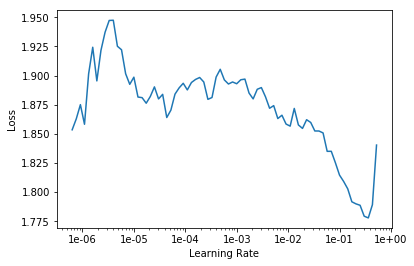

In [18]:
learn.recorder.plot(skip_end = 15)

In [39]:
learn.recorder.plot??

In [40]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss
1,0.941422,0.958181
2,0.861357,0.889940
3,0.771895,0.835397
4,0.659281,0.813659
5,0.551356,0.813588


In [41]:
learn.save('dotprod')

# Interpretation

In [19]:
learn.load('dotprod');

In [20]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)

We can have some nice deductions using the pandas framework

In [21]:
g = rating_movie.groupby(title)['rating'].count()
top_movies = g.sort_values(ascending = False).index.values[:1000]
top_movies[:10]

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

These are movies that have been rated the most (top movies) or the most popular ones

### Learning about Movie Bias

In [23]:
movie_bias = learn.bias(top_movies, is_item=True)
movie_bias.shape

torch.Size([1000])

In [28]:
mean_ratings = rating_movie.groupby(title)['rating'].mean()

In [29]:
movie_ratings = [(b, i, mean_ratings.loc[i]) for i, b in zip(top_movies, movie_bias)]

In [30]:
item0 = lambda o:o[0]

In [31]:
sorted(movie_ratings, key = item0)[:15]

[(tensor(-0.3347),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.2868),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.2680), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.2678), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.2540), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.2474), 'Grease 2 (1982)', 2.0),
 (tensor(-0.2431), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.2390), "McHale's Navy (1997)", 2.1884057971014492),
 (tensor(-0.2377), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.2346), 'Bio-Dome (1996)', 1.903225806451613),
 (tensor(-0.2327), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.2274), 'Thinner (1996)', 2.4489795918367347),
 (tensor(-0.2209), 'Speed 2: Cruise Control (1997)', 2.1315789473684212),
 (tensor(-0.2093), 'Beautician and the Beast, The (1997)', 2.313953488372093),
 (tensor(-0.2069), 'Home Alon

In [32]:
sorted(movie_ratings, key = item0, reverse = True)[:15]

[(tensor(0.6007), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.5802), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.5550), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.5506), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.5352), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.5167), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.5031), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.4817), 'Apt Pupil (1998)', 4.1),
 (tensor(0.4817), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.4752), 'Close Shave, A (1995)', 4.491071428571429),
 (tensor(0.4750), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.4743), 'Usual Suspects, The (1995)', 4.385767790262173),
 (tensor(0.4662), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.4555), 'Boot, Das (1981)', 4.203980099502488),
 (tensor(0.4477), "One Flew Over the Cuckoo's Nest (1975)", 4.291666666666667)]

### Learning about Movie Weights

In [34]:
movie_w = learn.weight(top_movies, is_item = True)

In [35]:
movie_w.shape

torch.Size([1000, 40])

In [36]:
movie_pca = movie_w.pca(3)
movie_pca.shape

torch.Size([1000, 3])

In [37]:
fac0, fac1, fac2 = movie_pca.t()

In [38]:
movie_comp = [(f, i) for f, i in zip(fac0, top_movies)]

In [40]:
sorted(movie_comp, key = itemgetter(0), reverse = True)[:10]

[(tensor(1.3032), 'Home Alone 3 (1997)'),
 (tensor(1.2092), "McHale's Navy (1997)"),
 (tensor(1.1910), 'Free Willy 3: The Rescue (1997)'),
 (tensor(1.1407), 'Children of the Corn: The Gathering (1996)'),
 (tensor(1.1349), 'Jungle2Jungle (1997)'),
 (tensor(1.1209), 'Congo (1995)'),
 (tensor(1.1107), 'Leave It to Beaver (1997)'),
 (tensor(1.1104), 'Bio-Dome (1996)'),
 (tensor(1.0919), 'D3: The Mighty Ducks (1996)'),
 (tensor(1.0730), 'Batman & Robin (1997)')]

In [41]:
sorted(movie_comp, key = itemgetter(0))[:10]

[(tensor(-1.0811), 'Close Shave, A (1995)'),
 (tensor(-1.0481), 'Wrong Trousers, The (1993)'),
 (tensor(-1.0382), 'Casablanca (1942)'),
 (tensor(-0.9765), 'Chinatown (1974)'),
 (tensor(-0.9709), 'Godfather, The (1972)'),
 (tensor(-0.9641), 'When We Were Kings (1996)'),
 (tensor(-0.9539), 'North by Northwest (1959)'),
 (tensor(-0.9532), 'Apocalypse Now (1979)'),
 (tensor(-0.9381), 'Secrets & Lies (1996)'),
 (tensor(-0.9333),
  'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)')]